<a href="https://colab.research.google.com/github/minseokey/Data_Science/blob/main/DataScience_12_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import requests
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
open('iris.data', 'wb').write(r.content)
vectors = []
answers = []
with open('iris.data', 'r') as f:
 for line in f:
  line = line.strip()
  if len(line) != 0:
    items = line.split(",")
    vectors.append([float(x) for x in items[:4]])
    answers.append(items[4])
    species = {a: i for i, a in enumerate(set(answers))} 

In [3]:
import pandas as pd
data = pd.read_csv("iris.data",names = ['a','b','c','d','e'])
data_x = data.iloc[:,0:4]
data_y = data.iloc[:,4]

data_x
data_y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: e, Length: 150, dtype: object

In [4]:
X = torch.tensor(torch.from_numpy(data_x.values),dtype= float)
X

<ipython-input-4-565d1380693f>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(torch.from_numpy(data_x.values),dtype= float)


tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0

In [5]:
X - X.mean(dim = 0)

tensor([[-7.4333e-01,  4.4600e-01, -2.3587e+00, -9.9867e-01],
        [-9.4333e-01, -5.4000e-02, -2.3587e+00, -9.9867e-01],
        [-1.1433e+00,  1.4600e-01, -2.4587e+00, -9.9867e-01],
        [-1.2433e+00,  4.6000e-02, -2.2587e+00, -9.9867e-01],
        [-8.4333e-01,  5.4600e-01, -2.3587e+00, -9.9867e-01],
        [-4.4333e-01,  8.4600e-01, -2.0587e+00, -7.9867e-01],
        [-1.2433e+00,  3.4600e-01, -2.3587e+00, -8.9867e-01],
        [-8.4333e-01,  3.4600e-01, -2.2587e+00, -9.9867e-01],
        [-1.4433e+00, -1.5400e-01, -2.3587e+00, -9.9867e-01],
        [-9.4333e-01,  4.6000e-02, -2.2587e+00, -1.0987e+00],
        [-4.4333e-01,  6.4600e-01, -2.2587e+00, -9.9867e-01],
        [-1.0433e+00,  3.4600e-01, -2.1587e+00, -9.9867e-01],
        [-1.0433e+00, -5.4000e-02, -2.3587e+00, -1.0987e+00],
        [-1.5433e+00, -5.4000e-02, -2.6587e+00, -1.0987e+00],
        [-4.3333e-02,  9.4600e-01, -2.5587e+00, -9.9867e-01],
        [-1.4333e-01,  1.3460e+00, -2.2587e+00, -7.9867e-01],
        

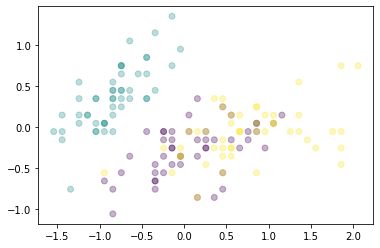

In [6]:
import matplotlib.pyplot as plt


speices = {x:i for i,x in enumerate(set(data_y))}
sp = [species[d] for d in data_y]

Z = X - X.mean(dim = 0)
plt.scatter(Z[:,0],Z[:,1],c = sp,alpha = 0.3)

plt.show()

In [7]:
# random vector
w = torch.randn(Z.shape[1])
w /= (w**2).sum() **0.5

# w에 사영 내렸을때 분산
variance = ((Z*w).sum(dim = 1)**2).mean()


In [8]:
def findPc(Z):
  w = torch.randn(Z.shape[1])
  lr = 0.1
  for epoch in range(101):
    w.requires_grad_(True)
    variance = ((Z*w).sum(dim = 1)**2).mean()
    variance.backward()

    with torch.no_grad():
      w += lr * w.grad
      w /= (w**2).sum() **0.5 
  print(f"{w},{variance.item()}")
  w.requires_grad_(False)
  return w,variance.item()

res = findPc(Z)
res

tensor([-0.3623,  0.0817, -0.8564, -0.3587], requires_grad=True),4.196671701591665


(tensor([-0.3623,  0.0817, -0.8564, -0.3587]), 4.196671701591665)

In [9]:
def PCA(k,Z):
  Z = torch.tensor(Z)
  PC = []
  VAR = []

  for i in range(k):
    w,v = findPc(Z)
    PC.append(w)
    VAR.append(v)
    Z = Z - w * (Z*w).sum(dim = 1).unsqueeze(1)

  return PC,VAR
#x = z - w x (z*w)
# Z - w * (Z*w).sum(dim = 1).unsqueeze(1)

res = PCA(4,Z)
res

tensor([ 0.3625, -0.0811,  0.8563,  0.3588], requires_grad=True),4.196666912721712


<ipython-input-9-08466943be00>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Z = torch.tensor(Z)


tensor([ 0.6551,  0.7307, -0.1796, -0.0679], requires_grad=True),0.2406246633127379
tensor([-0.5340,  0.5404,  0.0048,  0.6502], requires_grad=True),0.07689679573943044
tensor([-0.3928,  0.4092,  0.4842, -0.6663], requires_grad=True),0.024622605249332134


([tensor([ 0.3625, -0.0811,  0.8563,  0.3588]),
  tensor([ 0.6551,  0.7307, -0.1796, -0.0679]),
  tensor([-0.5340,  0.5404,  0.0048,  0.6502]),
  tensor([-0.3928,  0.4092,  0.4842, -0.6663])],
 [4.196666912721712,
  0.2406246633127379,
  0.07689679573943044,
  0.024622605249332134])

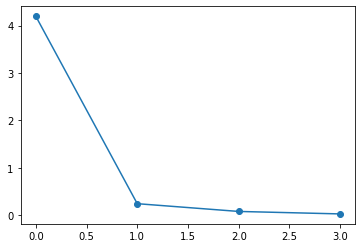

In [10]:
plt.plot(res[1],"-o")
plt.show()

<ipython-input-9-08466943be00>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Z = torch.tensor(Z)


tensor([ 0.3623, -0.0818,  0.8564,  0.3587], requires_grad=True),4.196672271929137
tensor([ 0.6593,  0.7266, -0.1767, -0.0784], requires_grad=True),0.24062632052396932
tensor([ 0.6090, -0.6327, -0.1247, -0.4617], requires_grad=True),0.07731992536962208
tensor([ 0.2513, -0.2549, -0.4689,  0.8075], requires_grad=True),0.024200365035651997


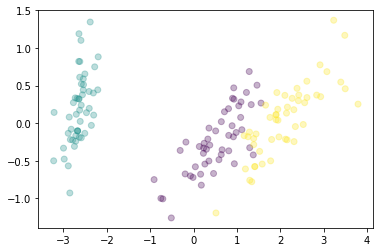

In [11]:
def transform(Z,W):
  Z = Z.float()
  return Z @ torch.stack(W).T
 # @ = 메트릭스 곱
 #.T => 트랜스포즈
 # Stack => 열로 좌표들을 쌓음

W,_ = PCA(4,Z)
A = transform(Z,W)

plt.scatter(A[:,0],A[:,1],c = sp,alpha = 0.3)
plt.show()
